In [1]:
import numpy as np

In [2]:
X = np.array([1, 1.4, 2.1])
w = np.array([0.4, 0.3, 0.5])

In [3]:
#Net input
def net_input(X, w):
    return np.dot(X, w)

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

In [4]:
print('P(y=1|x) = %.3f' % logistic_activation(X, w))

P(y=1|x) = 0.866


In [5]:
W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])

A = np.array([[1, 0.1, 0.4, 0.6]])

In [6]:
Z = np.dot(W, A[0])
y_probas = logistic(Z)
print('Net Input: \n', Z)

Net Input: 
 [1.78 0.76 1.65]


In [7]:
print('Output Units:\n', y_probas)

Output Units:
 [0.85569687 0.68135373 0.83889105]


In [8]:
y_class = np.argmax(Z, axis=0)
print('Predicted class label: %d' % y_class)

Predicted class label: 0


- Softmax in multiclass.

In [9]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

In [10]:
y_probas = softmax(Z)
print('Probabilities:\n', y_probas)

Probabilities:
 [0.44668973 0.16107406 0.39223621]


In [11]:
np.sum(y_probas)

1.0

In [12]:
import tensorflow as tf

z_tensor = tf.expand_dims(Z, axis=0)
tf.keras.activations.softmax(z_tensor)

<tf.Tensor: shape=(1, 3), dtype=float64, numpy=array([[0.44668973, 0.16107406, 0.39223621]])>

- Tanh.

The advantage of the hyperbolic tangent over the logistic function is that it has
a broader output spectrum ranging in the open interval (–1, 1), which can improve
the convergence of the back-propagation algorithm (Neural Networks for Pattern
Recognition, C. M. Bishop, Oxford University Press, pages: 500-501, 1995).

In [13]:
def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

In [14]:
tanh(Z)

array([0.94469516, 0.64107696, 0.92885762])

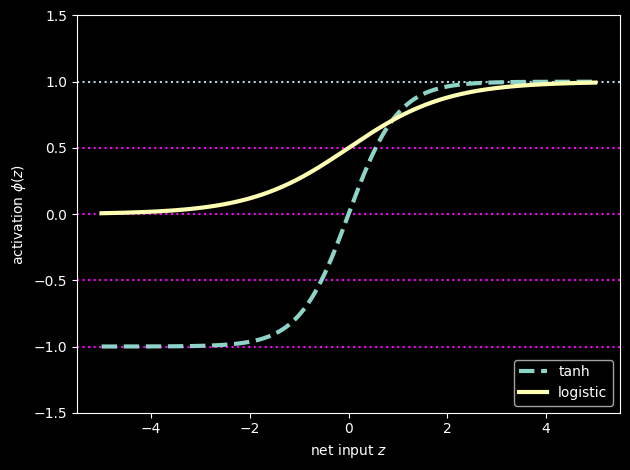

In [15]:
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)
plt.ylim([-1.5, 1.5])
plt.xlabel('net input $z$')
plt.ylabel('activation $\phi(z)$')
plt.axhline(1, color='lightblue', linestyle=':')
plt.axhline(0.5, color='magenta', linestyle=':')
plt.axhline(0, color='magenta', linestyle=':')
plt.axhline(-0.5, color='magenta', linestyle=':')
plt.axhline(-1, color='magenta', linestyle=':')
plt.plot(z, tanh_act,
         linewidth=3, linestyle='--',
         label='tanh')

plt.plot(z, log_act,
         linewidth=3,
         label='logistic')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

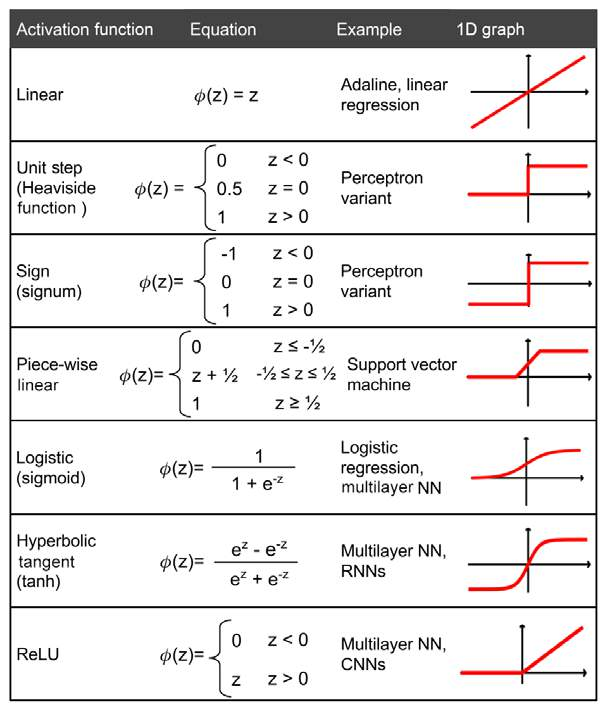

In [16]:
@tf.function(input_signature=(tf.TensorSpec(shape=[None],
                                           dtype=tf.int32),
                              tf.TensorSpec(shape=[None],
                                           dtype=tf.int32),
                              tf.TensorSpec(shape=[None],
                                           dtype=tf.int32))
             )
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z


In [17]:
tf.print("Scalar Inputs: ", compute_z([1], [3], [5]))

Scalar Inputs:  [1]


In [18]:
tf.print('Rank 1 Inputs:', compute_z([1], [2], [3]))

Rank 1 Inputs: [1]


In [19]:
tf.print('Rank 2 Inputs:', compute_z([[1]], [[2]], [[3]]))

TypeError: Binding inputs to tf.function failed due to `Can not cast TensorSpec(shape=(1, 1), dtype=tf.int32, name=None) to TensorSpec(shape=(None,), dtype=tf.int32, name=None)`. Received args: ([[1]], [[2]], [[3]]) and kwargs: {} for signature: (a: TensorSpec(shape=(None,), dtype=tf.int32, name=None), b: TensorSpec(shape=(None,), dtype=tf.int32, name=None), c: TensorSpec(shape=(None,), dtype=tf.int32, name=None)).

In [ ]:
tf.print('Rank 1 Inputs:', compute_z([1, 2], [2, 4], [3, 6]))

Rank 1 Inputs: [1 2]
